# Market Beta 

### What is beta? 

The beta ($\beta{}$) of an investment instrument is a measurment of its volatility relative to the broad market. The statistic is normally used as a measure of risk often used in portfolio construction. 

The market used to compute asset betas can be any instrument representative of an asset class. The S&P 500 is often used to compute a stock's beta in traditional markets since it is a good representatio of equity markets as a whole. BTC or ETH are good market candidates when computing token betas.

### Interpretation

The beta of the market is always equal to 1. The asset beta to a specific market can be interpreted as follows:

* $\beta{}$ = 1 means the volatility of the asset is the same as the market
* $\beta{}$ > 1 means the volatility of the asset is greater than market
* 0 < $\beta{}$ < 1 means the volatility of the asset is less than market
* $\beta{}$ = 0 means the asset is uncorrelated to the market
* $\beta{}$ < 0 means the assset is negatively correlated to the market

### Examples

High $\beta{}$ – A token with a $\beta{}$ that’s greater than 1 is more volatile than the market (in this case BTC). For example, a high-risk DeFi token with a $\beta{}$ of 1.75 implies that on average the token will experience 75% more volatility relative to Bitcoin. If Bitcoin's were to tumble 10%, on average the token's price will fall 17.5% (10% * 1.75).

Low $\beta{}$ – A token with a $\beta{}$ that’s lower than 1 is less volatile than the whole market (again the market here is BTC). As an example, consider a data management protocol with a $\beta{}$ of 0.45. In this case, if BTC were to drop 10%, the data management protocol would only suffer a 4.5% drop, on average. 

### Calculation

There are two ways to estimate an asset's beta. The first is to use the beta formula which is calculated as the covariance between the asset and the market divided by the variance of the market. The formula is as follows:

$$
\beta{} = \frac{Cov(a,m)}{Var(m)}
$$

Where *a* is the daily returns of the asset and and *m* is the daily returns of the reference market.

The second method is to perform a linear regression using the token's dialy returns as the dependent variable and the market's return as the independent variable. The result of the regression coefficient is the asset beta to the given market.

Now lets see how we can compute asset betas using Python and [Messari's Python library](https://objective-lalande-8ec88b.netlify.app/)

First we need to import a couple of libraries

In [1]:
from messari.messari import Messari
from betas import compute_betas
import pandas as pd

In [2]:
# Create an instance of the Messari API to pull historical price data for an asset universe
m = Messari('your_api_key')

In [3]:
# Define asset universe by sector
smart_contract_platforms = ['ETH', 'SOL', 'LUNA', 'AVAX', 'ATOM', 'NEAR', 'FTM']
dexs = ['UNI', 'SUSHI', 'BNT', 'CRV', 'LRC', 'SUSHI']
defi_2_0 = ['ALCX', 'SPELL', 'TOKE', 'OHM', 'FXS', 'CVX']
lending = ['AAVE', 'MKR', 'COMP', 'ANC', 'XVS']
data_management = ['GRT', 'BAND', 'API3']
storage = ['FIL', 'AR', 'SC', 'STORJ']
gaming = ['AXS', 'SAND', 'CHZ', 'ENJ', 'YGG', 'ILV', 'MANA', 'RARI']  
asset_universe = smart_contract_platforms + dexs + lending + data_management + storage + gaming + defi_2_0

In [4]:
# Pull price data using the Messari API
start = '2022-01-01'
end = '2022-03-06'
prices = m.get_metric_timeseries(asset_universe, 'price', start, end)

# Keep only closing prices
prices = prices.xs('close', axis=1, level=1)
prices.head()

,ETH,SOL,LUNA,AVAX,ATOM,NEAR,FTM,UNI,SUSHI,BNT,...,YGG,ILV,MANA,RARI,ALCX,SPELL,TOKE,OHM,FXS,CVX
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01,3766.532992,179.155937,91.691903,114.195272,36.341238,15.178905,2.584341,17.479876,9.138407,3.345833,...,5.581908,1044.185427,3.348083,18.364854,314.731389,0.023246,39.792588,362.307687,36.578046,49.463039
2022-01-02,3829.897541,176.392454,89.466147,113.118265,35.536459,14.390875,2.484514,18.409893,8.932556,3.395584,...,5.604856,1048.212810,3.338468,16.801890,318.458565,0.023952,41.825429,369.335900,36.001138,47.986473
2022-01-03,3765.585515,170.131201,88.864210,108.096944,39.250005,16.488727,2.868405,18.460280,8.520118,3.429079,...,5.324758,1033.600080,3.249706,15.312739,326.141876,0.022140,47.551960,326.934391,32.576727,47.390986
2022-01-04,3784.977387,167.735108,84.535495,103.320413,42.076981,16.027078,2.878789,18.207879,8.073258,3.396458,...,5.183838,977.775741,3.174479,15.512269,298.659206,0.021104,50.044321,325.725792,37.697370,49.439739
2022-01-05,3539.516396,154.467556,78.446542,97.399697,38.658981,15.307374,2.931862,17.109200,7.647269,3.299881,...,4.713720,892.950674,2.916913,14.445957,366.461764,0.018246,53.519481,316.879681,34.739673,42.919420


Now that we have a price series for all our assets, we can pass the price dataframe to the **compute_betas** function along with the ticker of the market we'd like to use as reference. The function computes $\beta{}$ using the regression approach.

**NOTE** The function will use Yahoo Finance for equity indexes. You will need to [install](https://pypi.org/project/yfinance/) the yfinance library if you plan on using equities data.

In [5]:
market = 'BTC'
btc_asset_betas = compute_betas(prices, market_ticker=market)
btc_asset_betas.head()

,BTC
ETH,1.189250
SOL,1.412476
LUNA,1.553203
AVAX,1.665892
ATOM,1.281610


We can do the same using different markets for a thorough comparison. Lets compare compute asset betas relative to Ethereum and the S&P 500

In [6]:
# Compute asset betas to Ethereum
eth_market = 'ETH'
eth_asset_betas = compute_betas(prices, market_ticker='ETH')
eth_asset_betas.head()

,ETH
SOL,1.169257
LUNA,1.094837
AVAX,1.225461
ATOM,1.026394
NEAR,1.126130


In [7]:
# Compute asset betas to S&P 500
snp_market = '^GSPC' # Yahoo Finance ticker for the S&P 500
snp_asset_betas = compute_betas(prices, market_ticker=snp_market)
snp_asset_betas.head()

[*********************100%***********************]  1 of 1 completed


,^GSPC
ETH,2.441655
SOL,2.537124
LUNA,1.799032
AVAX,2.571743
ATOM,1.337772


Lastly we can combine all three betas dataframe into one in order to easily generate a betas dashboard

In [8]:
from betas import betas_dashboard

In [9]:
betas_df = pd.concat([btc_asset_betas, eth_asset_betas, snp_asset_betas], axis=1)
betas_df.head()

,BTC,ETH,^GSPC
ETH,1.189250,NaN,2.441655
SOL,1.412476,1.169257,2.537124
LUNA,1.553203,1.094837,1.799032
AVAX,1.665892,1.225461,2.571743
ATOM,1.281610,1.026394,1.337772


Lastly, we create a sector mapping as a pandas dictionary to correctly group assets in different sector and be able to compute sector betas

In [10]:
# Sector mapping
sector_mapping = {'ETH': 'Smart Contract Platform',
                  'SOL': 'Smart Contract Platform',
                  'LUNA': 'Smart Contract Platform',
                  'AVAX': 'Smart Contract Platform',
                  'ATOM': 'Smart Contract Platform',
                  'NEAR': 'Smart Contract Platform',
                  'FTM': 'Smart Contract Platform',
                  'UNI': 'DEX',
                  'SUSHI': 'DEX',
                  'BNT': 'DEX',
                  'CRV': 'DEX',
                  'LRC': 'DEX',
                  'SUSHI': 'DEX',
                  'ALCX': 'DeFi2.0',
                  'SPELL': 'DeFi2.0',
                  'TOKE': 'DeFi2.0',
                  'OHM': 'DeFi2.0',
                  'FXS': 'DeFi2.0',
                  'CVX': 'DeFi2.0',
                  'AAVE': 'Lending',
                  'MKR': 'Lending',
                  'COMP': 'Lending',
                  'ANC': 'Lending',
                  'XVS': 'Lending',
                  'GRT': 'Data Management',
                  'BAND': 'Data Management',
                  'API3': 'Data Management',
                  'FIL': 'File Storage',
                  'AR': 'File Storage',
                  'SC': 'File Storage',
                  'STORJ': 'File Storage',
                  'AXS': 'Gaming',
                  'SAND': 'Gaming',
                  'CHZ': 'Gaming',
                  'ENJ': 'Gaming',
                  'YGG': 'Gaming',
                  'ILV': 'Gaming',
                  'MANA': 'Gaming',
                  'RARI': 'Gaming',
                  'SLP': 'Gaming'}

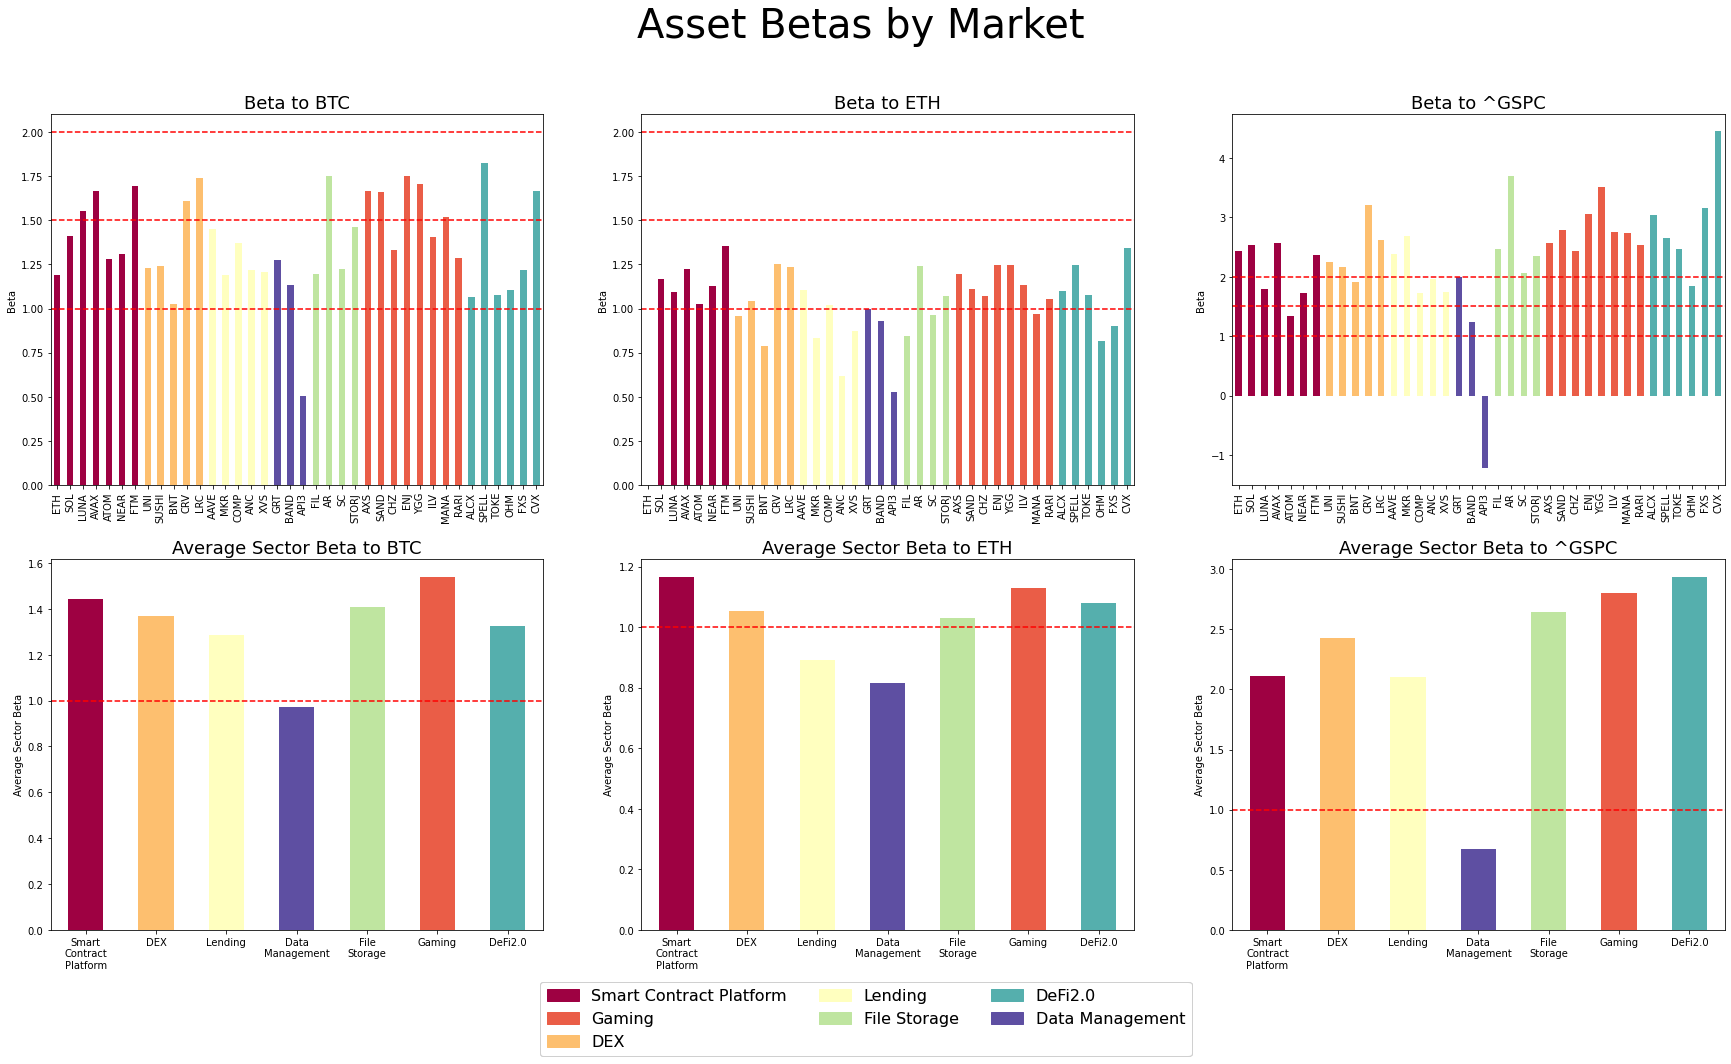

In [11]:
# Generate dashboard using asset betas dataframe and the sector mapping dictionary
betas_dashboard(betas_df, sector_mapping)